In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
# Optional parameter for rewriting saved figures
save_figs = False

In [3]:
MICU_admits_clean = pd.read_csv('MICU_admits_clean.csv')

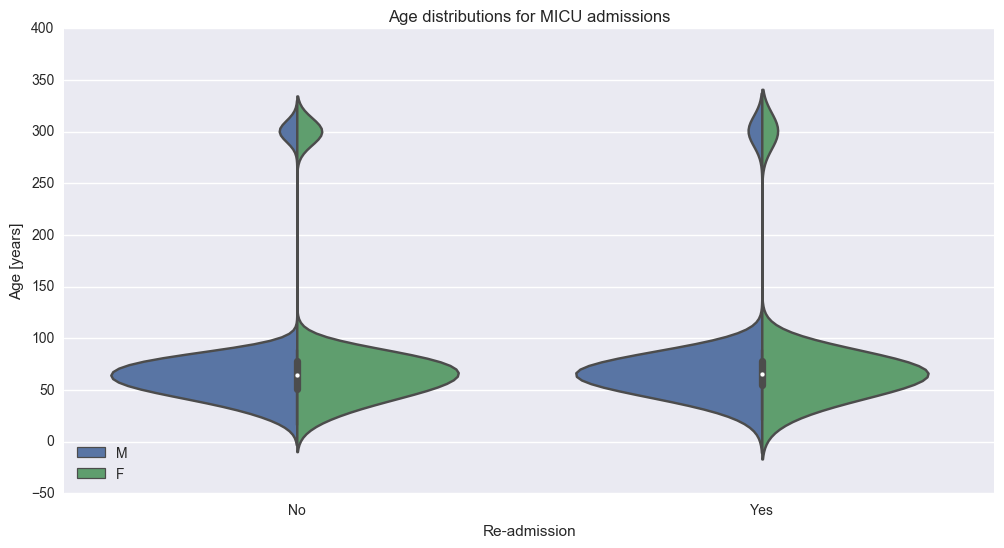

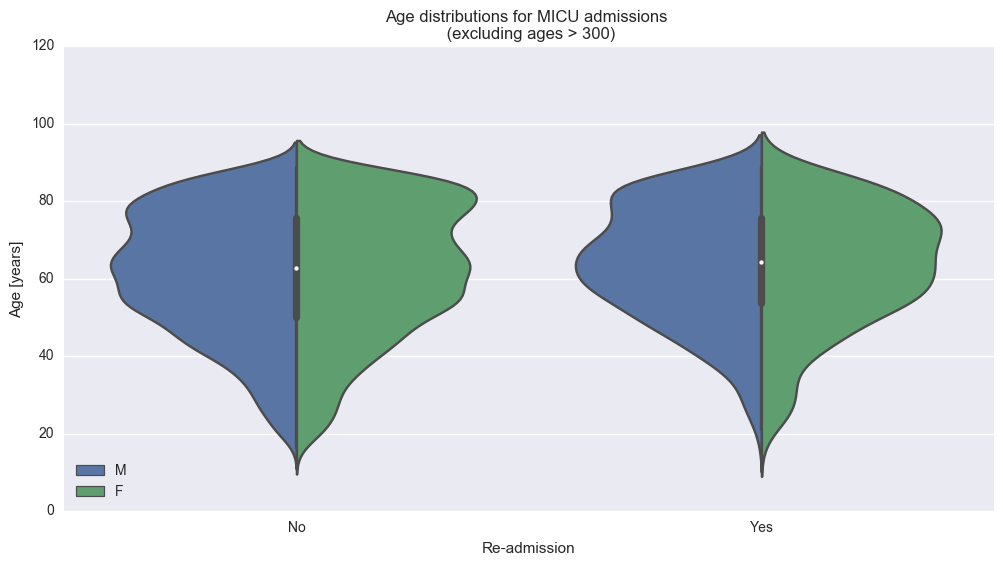

In [4]:
fig = plt.figure(figsize=(12,6))

ax = sns.violinplot(x="future_readmit", hue="gender", y="age",data=MICU_admits_clean, split=True)
plt.legend(loc='lower left')
plt.xlabel('Re-admission')
plt.ylabel('Age [years]')
plt.title('Age distributions for MICU admissions')
if save_figs:
    fig.savefig('figures/Age_distribution_all.png')

fig = plt.figure(figsize=(12,6))
ax = sns.violinplot(x="future_readmit", hue="gender", y="age",data=MICU_admits_clean[MICU_admits_clean.age<300], split=True)
plt.legend(loc='lower left')
plt.xlabel('Re-admission')
plt.ylabel('Age [years]')
plt.title('Age distributions for MICU admissions \n (excluding ages > 300)')
if save_figs:
    fig.savefig('figures/Age_distribution_under300.png')

In [5]:
MICU_single_admit = MICU_admits_clean.loc[MICU_admits_clean.future_readmit == 'No']
MICU_readmit = MICU_admits_clean.loc[MICU_admits_clean.future_readmit == 'Yes']

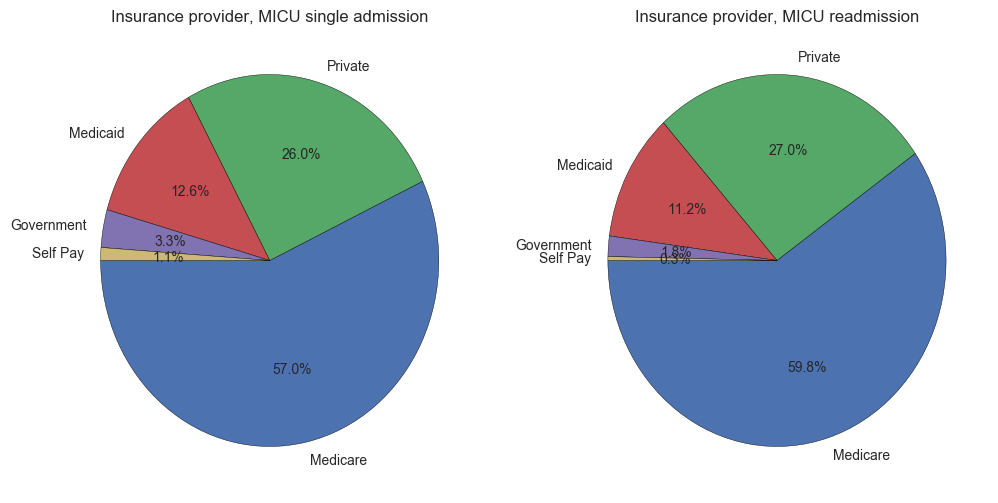

In [6]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
MICU_single_admit.insurance.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle = 180
    
)
plt.title('Insurance provider, MICU single admission')
plt.ylabel('')

plt.subplot(122)
MICU_readmit.insurance.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle = 180
)
plt.title('Insurance provider, MICU readmission')
plt.ylabel('')

if save_figs:
    fig.savefig('figures/insurance.png')

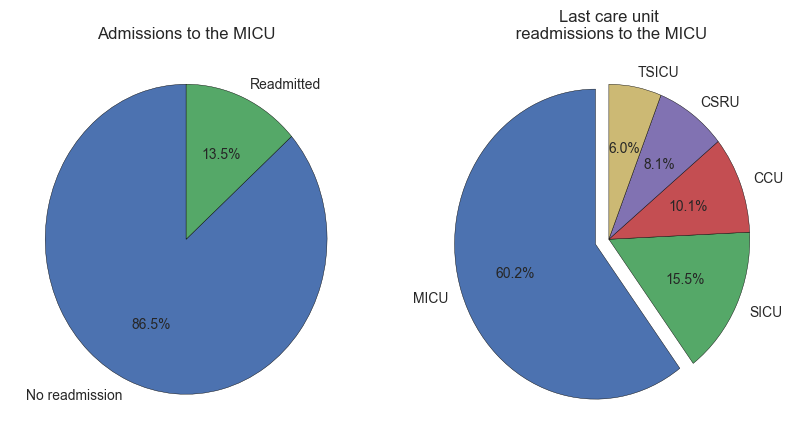

In [7]:
fig = plt.figure(figsize = (10, 5))
plt.subplot(121)
MICU_admits_clean.future_readmit.value_counts().plot.pie(
    labels = ['No readmission', 'Readmitted'],
    startangle = 90,
    autopct='%1.1f%%'
)
plt.ylabel('')
plt.title('Admissions to the MICU')

plt.subplot(122)
MICU_admits_clean.readmit_last_careunit.value_counts().plot.pie(
    labels = MICU_admits_clean.readmit_last_careunit.value_counts().keys(),
    startangle = 90,
    autopct='%1.1f%%',
    explode = (0.1, 0, 0, 0, 0)
)
plt.title('Last care unit\n readmissions to the MICU')
plt.ylabel('')

if save_figs:
    fig.savefig('figures/MICU_readmit.png')

In [8]:
data = MICU_admits_clean

In [9]:
data.shape

(8794, 43)

In [10]:
print 'Number of unique patient ids: {}'.format(len(data.subject_id.unique()))

Number of unique patient ids: 7633


In [11]:
print 'age\n',data.age.describe().ix[['mean', 'std']],'\n'
print 'age (<300)\n', data.loc[data.age<300].age.describe().ix[['mean', 'std']], '\n'
print 'sapsii\n', data.sapsii.describe().ix[['mean', 'std']],'\n'
print 'sofa\n', data.sofa.describe().ix[['mean', 'std']],'\n'
print data[['urea_n_min','urea_n_mean','urea_n_max',]].describe().ix[['mean', 'std']],'\n'
print data[['urea_n_min','urea_n_mean','urea_n_max',]].describe().ix[['mean', 'std']], '\n'
print data[['magnesium_max','albumin_min','calcium_min']].describe().ix[['mean', 'std']], '\n'
print data[['resprate_min','resprate_mean','resprate_max']].describe().ix[['mean', 'std']], '\n'
print data[['glucose_min','glucose_mean','glucose_max']].describe().ix[['mean', 'std']], '\n'
print data[['hr_min','hr_mean','hr_max']].describe().ix[['mean', 'std']], '\n'
print data[['sysbp_min','sysbp_mean','sysbp_max']].describe().ix[['mean', 'std']], '\n'
print data[['diasbp_min','diasbp_mean','diasbp_max']].describe().ix[['mean', 'std']], '\n'
print data[['temp_min','temp_mean','temp_max']].describe().ix[['mean', 'std']], '\n'
# print data[['urine_min','urine_mean','urine_max']].describe().ix[['mean', 'std']]

age
mean    76.849690
std     60.243297
Name: age, dtype: float64 

age (<300)
mean    61.778947
std     16.562749
Name: age, dtype: float64 

sapsii
mean    36.382875
std     13.158422
Name: sapsii, dtype: float64 

sofa
mean    4.519786
std     2.951734
Name: sofa, dtype: float64 

      urea_n_min  urea_n_mean  urea_n_max
mean    15.90630    26.685399   41.085968
std     14.03681    19.901940   30.821053 

      urea_n_min  urea_n_mean  urea_n_max
mean    15.90630    26.685399   41.085968
std     14.03681    19.901940   30.821053 

      magnesium_max  albumin_min  calcium_min
mean       2.428610     2.920844     7.540130
std        1.035637     0.686803     0.857565 

      resprate_min  resprate_mean  resprate_max
mean     11.061225      19.736837     31.780532
std       3.819213       3.695156      8.607033 

      glucose_min  glucose_mean  glucose_max
mean    91.024521    137.023185   220.636116
std     29.367878     39.690808   136.583623 

        hr_min    hr_mean      hr_ma

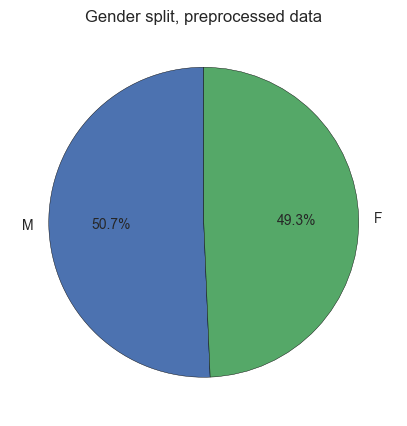

In [12]:
fig = plt.figure(figsize=(5,5))
data.gender.value_counts().plot.pie(startangle = 90, autopct='%1.1f%%')
plt.title('Gender split, preprocessed data')
plt.ylabel('')
if save_figs:
    fig.savefig('figures/preprocessed_gender.png')

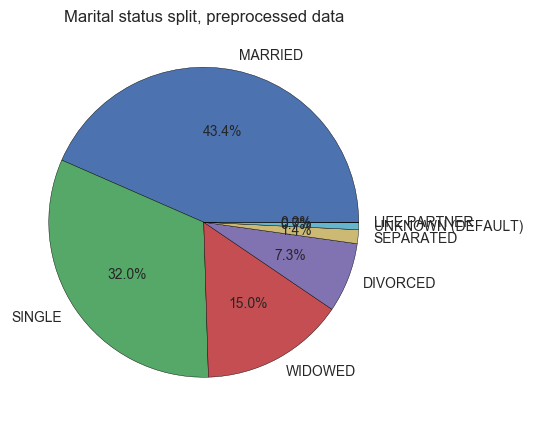

In [13]:
fig = plt.figure(figsize=(5,5))
data.marital_status.value_counts().plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('Marital status split, preprocessed data')
plt.ylabel('')
if save_figs:
    fig.savefig('figures/preprocessed_marital.png')

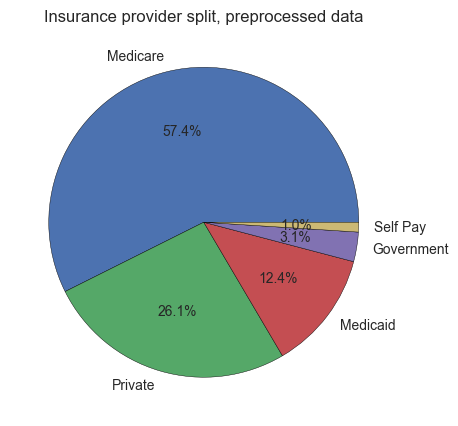

In [14]:
fig = plt.figure(figsize=(5,5))
data.insurance.value_counts().plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('Insurance provider split, preprocessed data')
plt.ylabel('')
if save_figs:
    fig.savefig('figures/preprocessed_insurance.png')

In [15]:
import numpy as np
np.sum(data.isnull())

subject_id                  0
hadm_id                     0
admittime                   0
dischtime                   0
first_careunit              0
last_careunit               0
age                         0
gender                      0
marital_status            347
insurance                   0
urea_n_min                  0
urea_n_max                  0
urea_n_mean                 0
platelets_min               0
platelets_max               0
platelets_mean              0
magnesium_max               0
albumin_min                 0
calcium_min                 0
resprate_min                0
resprate_max                0
resprate_mean               0
glucose_min                 0
glucose_max                 0
glucose_mean                0
hr_min                      0
hr_max                      0
hr_mean                     0
sysbp_min                   0
sysbp_max                   0
sysbp_mean                  0
diasbp_min                  0
diasbp_max                  0
diasbp_mea

In [17]:
data_neg = MICU_single_admit 
data_pos = MICU_readmit 

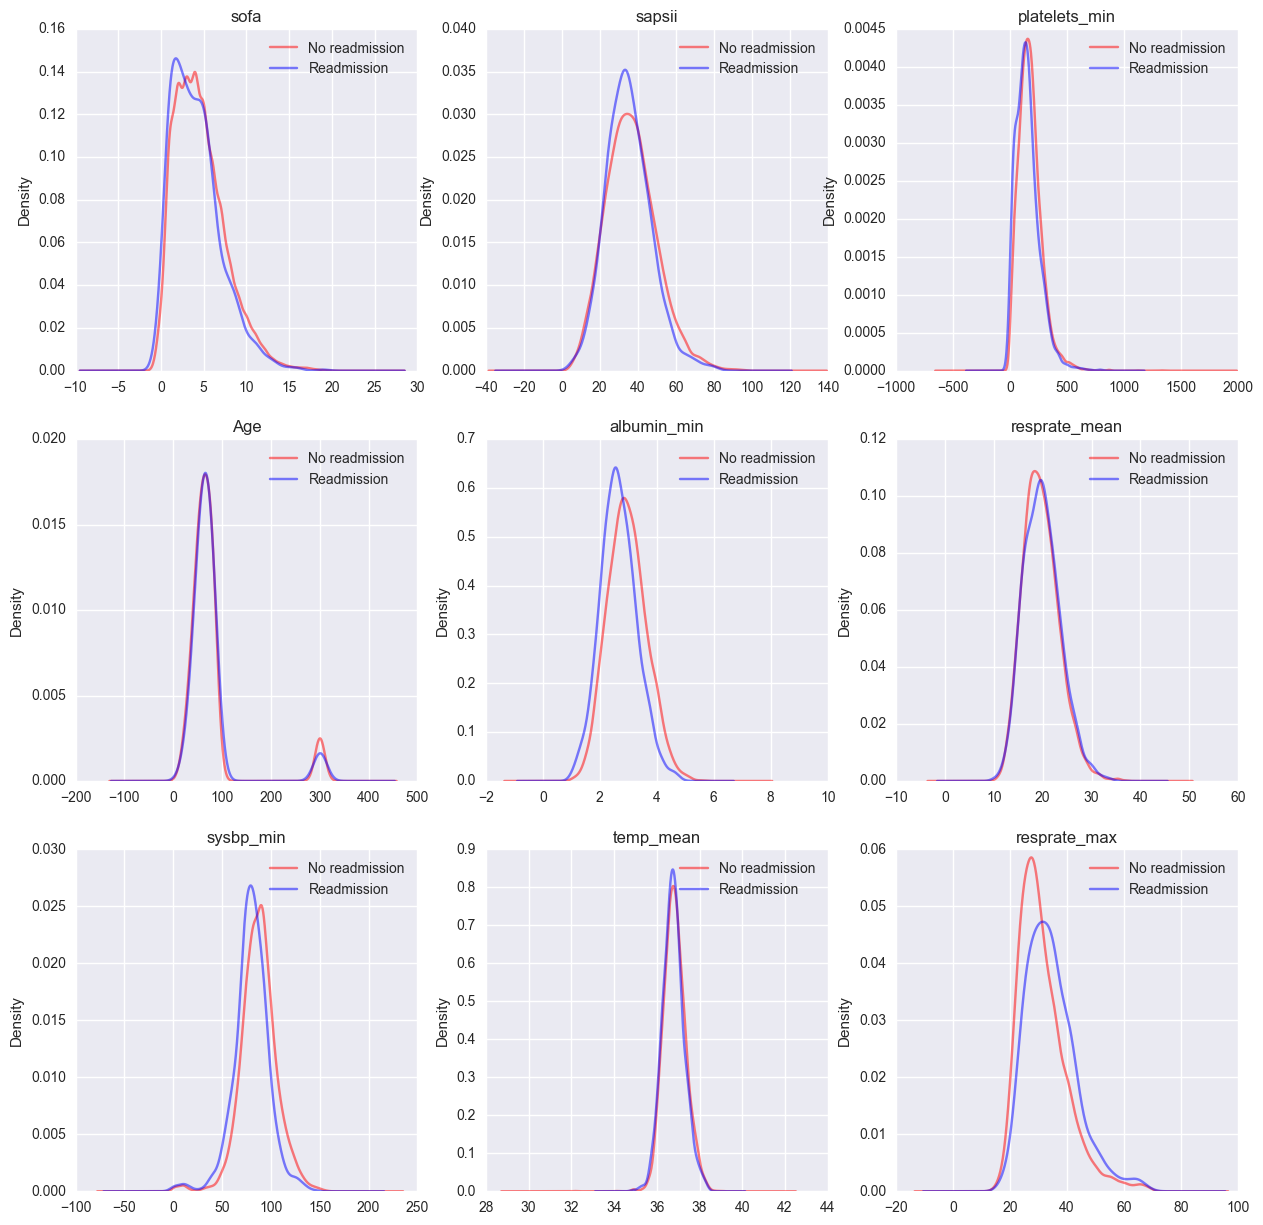

In [18]:
fig = plt.figure(figsize=(15,15))
plt.subplot(331)
data_neg.sofa.plot.kde(color = 'red', alpha = 0.5)
data_pos.sofa.plot.kde(color = 'blue', alpha = 0.5)
plt.title('sofa')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(332)
data_neg.sapsii.plot.kde(color = 'red', alpha = 0.5)
data_pos.sapsii.plot.kde(color = 'blue', alpha = 0.5)
plt.title('sapsii')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(333)
data_neg.platelets_min.plot.kde(color = 'red', alpha = 0.5)
data_pos.platelets_min.plot.kde(color = 'blue', alpha = 0.5)
plt.title('platelets_min')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(334)
data_neg.age.plot.kde(color = 'red', alpha = 0.5)
data_pos.age.plot.kde(color = 'blue', alpha = 0.5)
plt.title('Age')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(335)
data_neg.albumin_min.plot.kde(color = 'red', alpha = 0.5)
data_pos.albumin_min.plot.kde(color = 'blue', alpha = 0.5)
plt.title('albumin_min')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(336)
data_neg.resprate_mean.plot.kde(color = 'red', alpha = 0.5)
data_pos.resprate_mean.plot.kde(color = 'blue', alpha = 0.5)
plt.title('resprate_mean')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(337)
data_neg.sysbp_min.plot.kde(color = 'red', alpha = 0.5)
data_pos.sysbp_min.plot.kde(color = 'blue', alpha = 0.5)
plt.title('sysbp_min')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(338)
data_neg.temp_mean.plot.kde(color = 'red', alpha = 0.5)
data_pos.temp_mean.plot.kde(color = 'blue', alpha = 0.5)
plt.title('temp_mean')
plt.legend(labels=['No readmission', 'Readmission'])

plt.subplot(339)
data_neg.resprate_max.plot.kde(color = 'red', alpha = 0.5)
data_pos.resprate_max.plot.kde(color = 'blue', alpha = 0.5)
plt.title('resprate_max')
plt.legend(labels=['No readmission', 'Readmission'])
if save_figs:
    fig.savefig('figures/most_important_kdes.png')